# WeatherPy
----

### Analysis
* Temperature rises as one gets closer to the equator as would be expected.  In addition, between 20-40 deg latitude, the temperature contrasts between warmer temps and colder temps indicates a tilt of the earth's axis.

* Humidity was generally spread out, but there was a slight cluster near 0 degrees latitude (the equator).

* No relationship could be discerned in regards to wind spped and cloudiness; additional data such as elevation could be useful here.

---



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json
import random


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint
from api_keys import wm_key

from IPython.display import Image


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# # Build query URL, GET Request and save the API's response 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + wm_key 

#list of city data
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 100 for logging purposes
    if (i % 100 == 0 and i >= 100):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bacuit
City not found. Skipping...
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | tabursuq
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 6 of Set 1 | litovko
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | emerald
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | eldoret
Processing Record 13 of Set 1 | tateyama
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | markova
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of

Processing Record 84 of Set 2 | zhuanghe
Processing Record 85 of Set 2 | fortuna
Processing Record 86 of Set 2 | tabou
Processing Record 87 of Set 2 | masallatah
Processing Record 88 of Set 2 | kumluca
Processing Record 89 of Set 2 | pecos
Processing Record 90 of Set 2 | vaitupu
City not found. Skipping...
Processing Record 91 of Set 2 | cidreira
Processing Record 92 of Set 2 | chokurdakh
Processing Record 93 of Set 2 | hamilton
Processing Record 94 of Set 2 | impfondo
Processing Record 95 of Set 2 | plouzane
Processing Record 96 of Set 2 | talnakh
Processing Record 97 of Set 2 | tessalit
Processing Record 98 of Set 2 | kaitangata
Processing Record 99 of Set 2 | quatre cocos
Processing Record 0 of Set 3 | cherskiy
Processing Record 1 of Set 3 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 3 | saleaula
City not found. Skipping...
Processing Record 3 of Set 3 | kieta
Processing Record 4 of Set 3 | dikson
Processing Record 5 of Set 3 | sumbawa
City not found. Skippi

Processing Record 68 of Set 4 | ambon
Processing Record 69 of Set 4 | jiroft
City not found. Skipping...
Processing Record 70 of Set 4 | mount isa
Processing Record 71 of Set 4 | santa cruz
Processing Record 72 of Set 4 | meulaboh
Processing Record 73 of Set 4 | hit
Processing Record 74 of Set 4 | igarka
Processing Record 75 of Set 4 | maitum
Processing Record 76 of Set 4 | oistins
Processing Record 77 of Set 4 | edd
Processing Record 78 of Set 4 | green river
Processing Record 79 of Set 4 | cravo norte
Processing Record 80 of Set 4 | xuanhua
Processing Record 81 of Set 4 | yarada
Processing Record 82 of Set 4 | westport
Processing Record 83 of Set 4 | worland
Processing Record 84 of Set 4 | maicao
Processing Record 85 of Set 4 | longhua
Processing Record 86 of Set 4 | sibanicu
Processing Record 87 of Set 4 | chihuahua
Processing Record 88 of Set 4 | wejherowo
Processing Record 89 of Set 4 | moree
Processing Record 90 of Set 4 | fenoarivo
Processing Record 91 of Set 4 | kimbe
Processin

Processing Record 52 of Set 6 | krasnyy chikoy
Processing Record 53 of Set 6 | padalarang
Processing Record 54 of Set 6 | kon tum
Processing Record 55 of Set 6 | camopi
Processing Record 56 of Set 6 | east london
Processing Record 57 of Set 6 | kaniama
Processing Record 58 of Set 6 | zhigansk
Processing Record 59 of Set 6 | stornoway
City not found. Skipping...
Processing Record 60 of Set 6 | akyab
City not found. Skipping...
Processing Record 61 of Set 6 | waitati
Processing Record 62 of Set 6 | alamos
Processing Record 63 of Set 6 | warwick
Processing Record 64 of Set 6 | voyvozh
Processing Record 65 of Set 6 | nola
Processing Record 66 of Set 6 | bay roberts
Processing Record 67 of Set 6 | la sarre
Processing Record 68 of Set 6 | awbari
Processing Record 69 of Set 6 | arys
Processing Record 70 of Set 6 | iskateley
Processing Record 71 of Set 6 | druzhba
Processing Record 72 of Set 6 | calbuco
Processing Record 73 of Set 6 | pelym
Processing Record 74 of Set 6 | kamaishi
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [5]:
# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,norman wells,75,CA,1559173192,66,65.28,-126.83,48.20,5.82
1,tabursuq,40,TN,1559173192,77,36.46,9.25,60.80,4.70
2,severo-kurilsk,100,RU,1559173193,93,50.68,156.12,39.66,36.04
3,litovko,100,RU,1559173193,98,49.24,135.18,46.52,3.40
4,hilo,1,US,1559173194,54,19.71,-155.08,84.20,9.17


In [6]:
#export .csv
city_data_df.to_csv("city_data.csv", index=False, header=True)

In [7]:
#record count
city_data_df.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

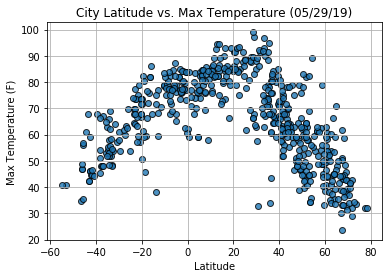

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

#Plot labels
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#save image
plt.savefig("CityTemp.png", transparent=True)
plt.show()

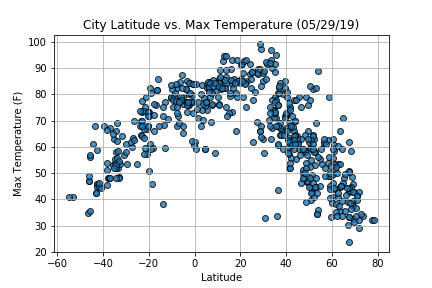

In [9]:
#see exported image (ensure it exported properly)
Image(filename='CityTemp.png') 

#### Latitude vs. Humidity Plot

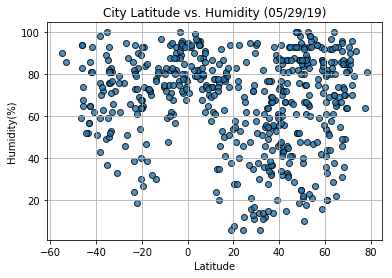

In [11]:
# Build scatter plot for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

#Plot labels
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

#save image
plt.savefig("CityHumidity.png", transparent=True)
plt.show()

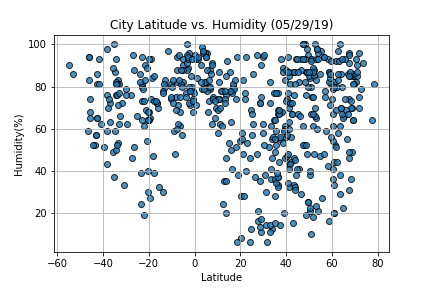

In [12]:
#see exported image (ensure it exported properly)
Image(filename='CityHumidity.png') 

#### Latitude vs. Cloudiness Plot

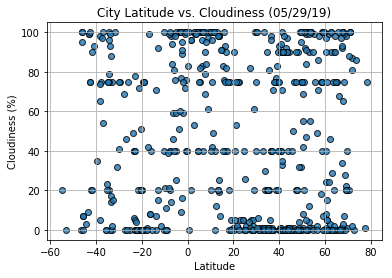

In [13]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness, 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

#Plot labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#save image
plt.savefig("CityCloud.png", transparent=True)
plt.show()


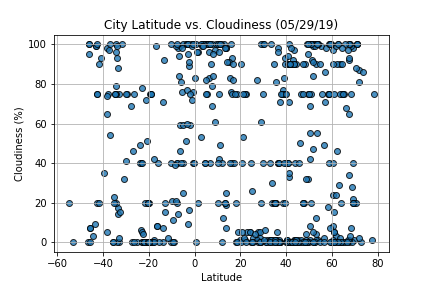

In [14]:
#see exported image (ensure it exported properly)
Image(filename='CityCloud.png') 

#### Latitude vs. Wind Speed Plot

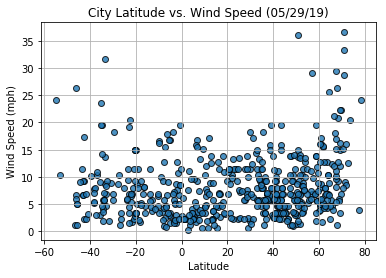

In [15]:
# Build scatter plot for latitude vs. Wind
plt.scatter(lats,
            wind_speed, 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

#Plot labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#save image
plt.savefig("CityWind.png", transparent=True)
plt.show()

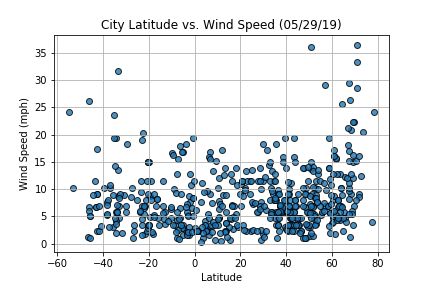

In [16]:
#see exported image (ensure it exported properly)
Image(filename='CityWind.png') 